# <u>Partie 2:</u> Entrainement du models

<b><u>Auteurs</u> :</b> Eytan Levy, Guillaume Surleau et Manitas Bahri  
<b><u>Date</u> :</b> Mars 2023

In [1]:
# Librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Définit le chemin du répertoire parent
import sys
sys.path.append("../")

# Custom packages
from py_scripts import pre_processing as pp
from py_scripts.utils import *


In [2]:
# Récupère les dataframes d'entrainement, de test et de validation.s
TRAIN: pd.DataFrame; VALID: pd.DataFrame

TRAIN, VALID = pp.load_preproc_dataset(split_X_y=False) # type: ignore
TRAIN, TEST = pp.split_by_groups(TRAIN)
(X_TRAIN, Y_TRAIN) = pp.get_X_y(TRAIN)
(X_TEST, Y_TEST) = pp.get_X_y(TEST)

# Entrainements

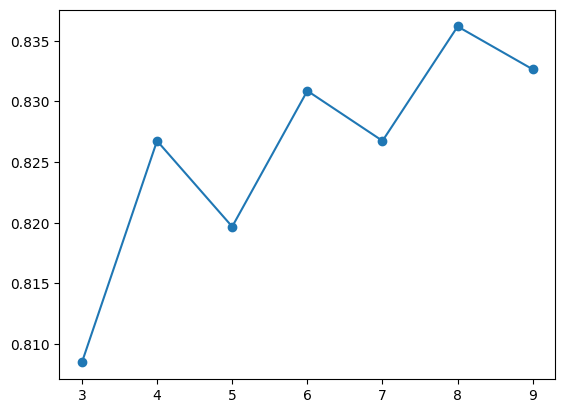

In [3]:
score = []
k_list = np.arange(3, 10)

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_TRAIN, Y_TRAIN.values.ravel())
    y_pred = knn.predict(X_TEST)
    score += [accuracy_score(Y_TEST, y_pred)]


plt.plot(k_list, score, "-o")
plt.show()

## Analyse des composantes principales (PCA)

In [ ]:
pca = PCA()
pca.fit(X_TRAIN)
exp_var_pca = pca.explained_variance_ratio_  # type: ignore

x = range(0, len(exp_var_pca))
pca_cumulative_var = np.cumsum(exp_var_pca)

plt.figure(figsize=(13, 4))
plt.bar(x, height=exp_var_pca, label="Explained variance individuel", alpha=.5)
plt.plot(pca_cumulative_var, marker="+", label="Explained variance cumulées")
plt.xlabel("Les principales composantes (index)")
plt.ylabel("Explained variance (en %)")
plt.legend()
plt.show()
